<a href="https://colab.research.google.com/github/aman18110014/ML_Assignment3/blob/main/LR_1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [6]:
bc = datasets.load_breast_cancer()
X, y = bc.data[:,:2], bc.target

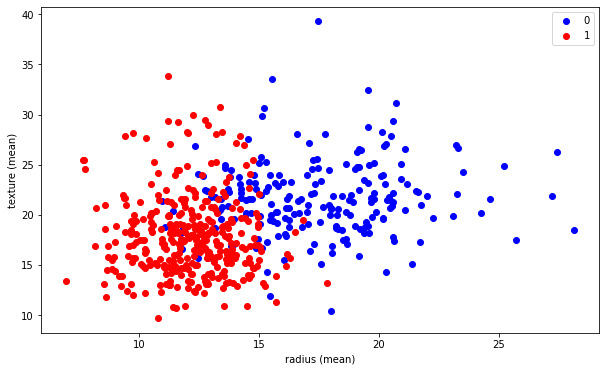

In [7]:

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.xlabel("radius (mean)")
plt.ylabel("texture (mean)")
plt.legend();

In [19]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=300000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1*x))
 
    def fit(self, X, y):
        if self.fit_intercept==True:
            X = self.add_intercept(X)
        self.W = np.zeros(X.shape[1])
        for i in range(self.num_iter):
            h = self.sigmoid(np.dot(X, self.W))
            gradient = np.dot(X.T, (h - y)) / y.size
            self.W = self.W - self.lr * gradient
            
            h = self.sigmoid(np.dot(X, self.W))
            loss = self.loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept==True:
            X = self.add_intercept(X)
        return self.sigmoid(np.dot(X, self.W))

    def predict(self, X):
        return self.predict_prob(X).round()

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X,y)
preds = model.predict(X)

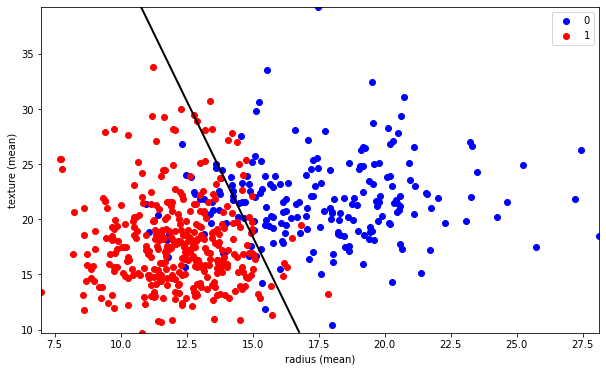

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
plt.xlabel("radius (mean)")
plt.ylabel("texture (mean)")
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
np.shape(xx1)
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob((grid)).reshape((xx1.shape))
plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');